In [4]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import graph_tool.all as gt
from datetime import datetime

# I list motifs in the following order 

In [5]:
str2gt = {'000000000000000000000000000000800000000000000080': 1, '000000000000000000000000000000800000000000000040': 2, '0000000000000000000000000000000000000000000000c0': 0, '0000000000000000000000000000002000000000000000c0': 4, '000000000000004000000000000000800000000000000080': 5, '0000000000000020000000000000002000000000000000c0': 9, '0000000000000000000000000000008000000000000000c0': 3, '000000000000000000000000000000a000000000000000c0': 7, '000000000000004000000000000000a000000000000000c0': 11, '0000000000000040000000000000008000000000000000c0': 8, '0000000000000040000000000000002000000000000000c0': 10, '000000000000006000000000000000a000000000000000c0': 12, '000000000000004000000000000000200000000000000080': 6}
idx = 1

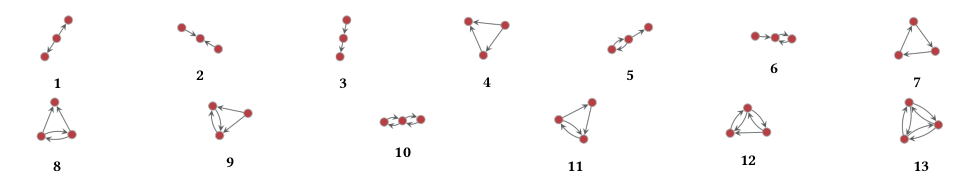

In [9]:
from IPython.display import Image
Image(filename='motif-ids.png') 

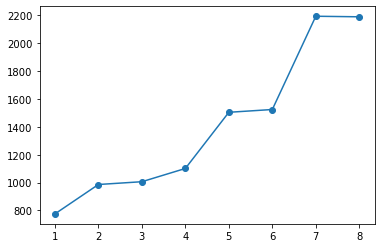

In [28]:
edge_counts = []
for idx in range(1,9):
    edge_df = pd.read_csv('Timelapsed/C-elegans-timelapsed-0'+str(idx)+'-condensed-edges.csv')
#     neuron_df = pd.read_csv('Timelapsed/C-elegans-timelapsed-0'+str(idx)+'-condensed-neurons.csv')
    edge_counts.append(edge_df.shape[0])
plt.plot([i for i in range(1,9)], edge_counts, marker='o')

# motif of size 3, left is distribution (percentage), right is the actual counts

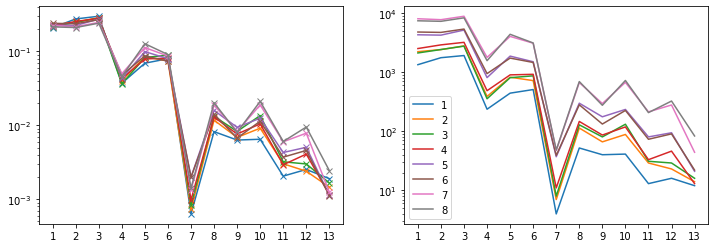

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

for idx in range(1,9):
    motif3_f = open('Timelapsed/C-elegans-timelapsed-0'+str(idx)+'-subgraphs/motif-size-003-certificates.txt', 'r')
    line = motif3_f.readline()
    motif_counts = [0 for i in range(13)]
    # motif_strs = []
    while line:
        if ': ' in line:
            motif_id = str2gt[line.split(': ')[0]]
            motif_counts[motif_id] = int(line.split(': ')[1].strip())
        line = motif3_f.readline()

    axs[0].plot([str(i) for i in range(1,14)], [i/sum(motif_counts) for i in motif_counts],marker='x',label=str(idx))
    axs[1].plot([str(i) for i in range(1,14)], [i for i in motif_counts],label=str(idx))
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].legend()
plt.show()